# Metodologías para cálculo del VaR - Documentación ejemplo

In [1]:
from Class_Metodologias import Metodologias
import matplotlib.pyplot as plt
import numpy as np
def grafico(var, title):
    plt.figure(dpi=80)
    for i,act in enumerate(var.columns):
        plt.plot(var[act], label=var.columns[i])
        plt.title(title),plt.grid(),plt.legend()
        plt.xticks(np.array(var.index.values[::len(var)//12]),rotation=60)
        plt.show()

In [2]:
activos = ["BA", "AMZN", "AAPL", "AAL", "GS"]
pais = "united states"
dinero = [100, 100, 100, 100, 100]
desde = "2018-02-14"
hasta = "2020-03-24"
alphas = [0.1,  0.05,  0.025,  0.01]

M = Metodologias(stocks=activos, 
                 dinero = dinero,
                 desde = desde, 
                 hasta = hasta,
                 alphas = alphas)

## Instancias:

In [3]:
print("Activos:",M.stocks)
print("Inversiones:",M.money)
print("Fecha inicial:",M.start)
print("Fecha final:", M.end)
print("alphas:", M.alphas)
print("Cantidad de activos:", M.n)
print("Periodos para BackTesting:", M.periodos )
print("Cantidad de dias para media movil:", M.dias) 
print("Cantidad de datos recopilados",M.N)

Activos: ['BA', 'AMZN', 'AAPL', 'AAL', 'GS']
Inversiones: [100, 100, 100, 100, 100]
Fecha inicial: 2018-02-14
Fecha final: 2020-03-24
alphas: [0.1, 0.05, 0.025, 0.01]
Cantidad de activos: 5
Periodos para BackTesting: 277
Cantidad de dias para media movil: 252
Cantidad de datos recopilados 529


**Participación de cada activo**

Participacion en cada activo: [0.2 0.2 0.2 0.2 0.2]


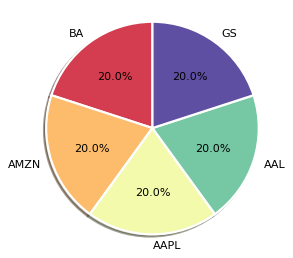

In [4]:
print("Participacion en cada activo:", M.W)
plt.figure(dpi=80)
plt.pie(M.W, labels=M.stocks, colors=[plt.get_cmap('Spectral')(i) for i in np.linspace(0.1, 1, M.n)],
        wedgeprops={'linewidth': 2, 'edgecolor' : 'w'},autopct='%1.1f%%',shadow=True, startangle=90, radius=1.1)
plt.show()

(530, 5)


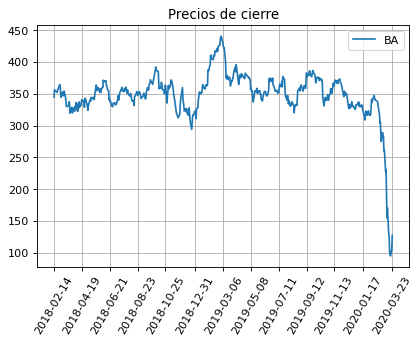

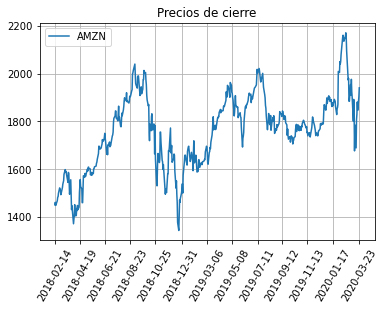

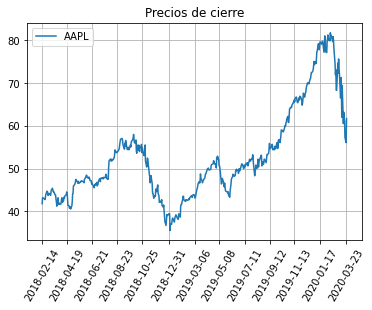

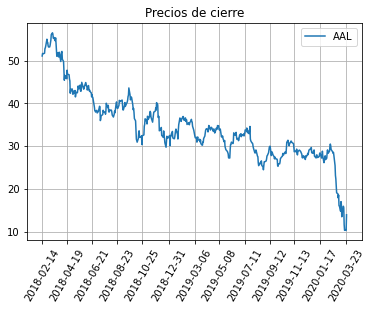

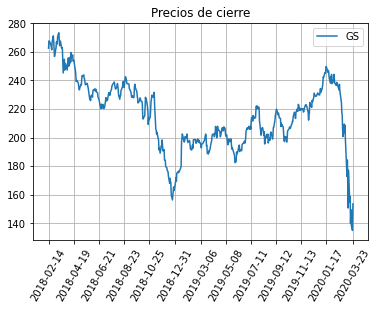

In [5]:
# Datos descargados (Precio de cierre)
print(M.data.shape)
grafico(M.data,"Precios de cierre")

(529, 5)


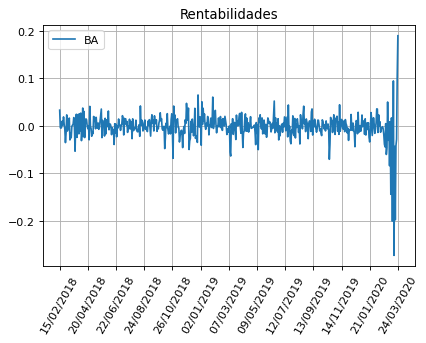

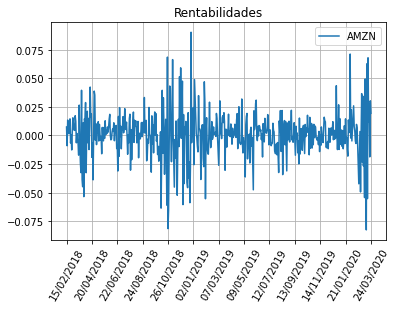

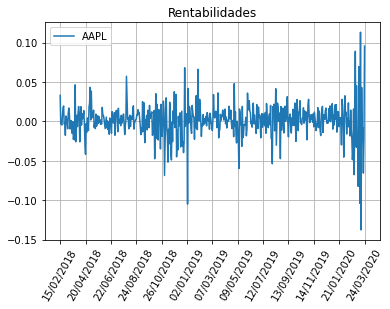

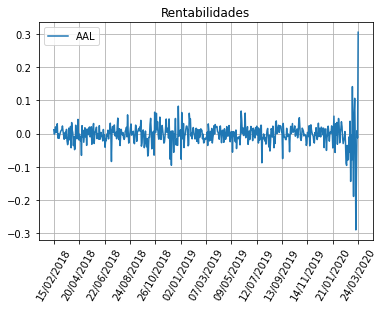

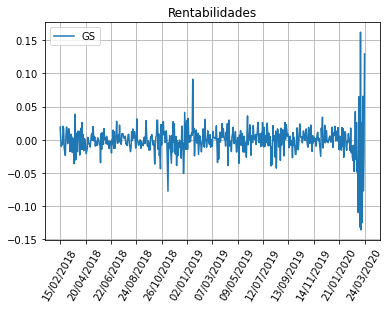

In [6]:
# Rentabilidad de cada activo
print(M.rent.shape)
grafico(M.rent,"Rentabilidades")

(529, 1)


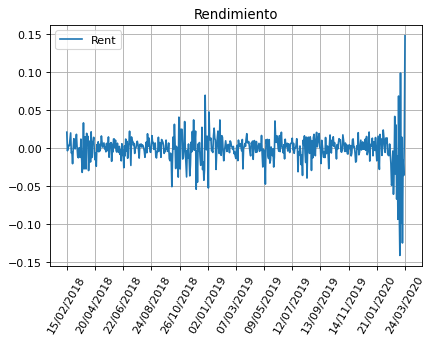

In [7]:
# Rendimiento del portafolio
print(M.rend.shape)
grafico(M.rend,"Rendimiento")

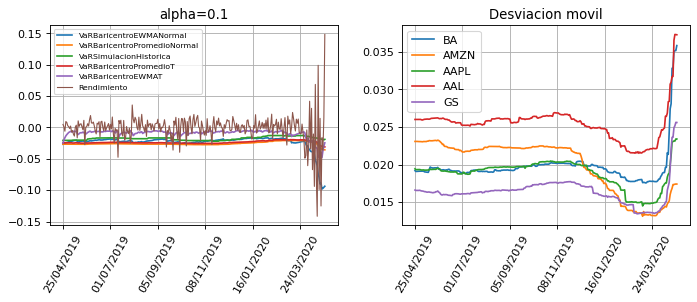

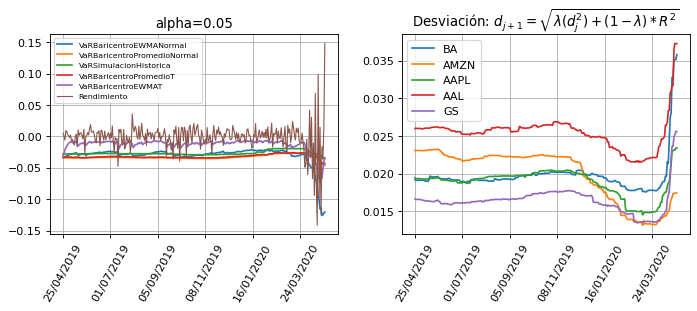

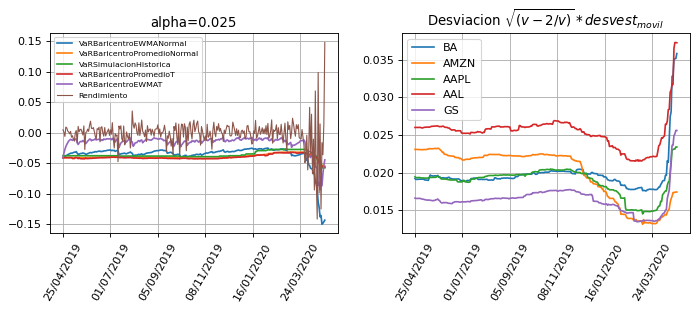

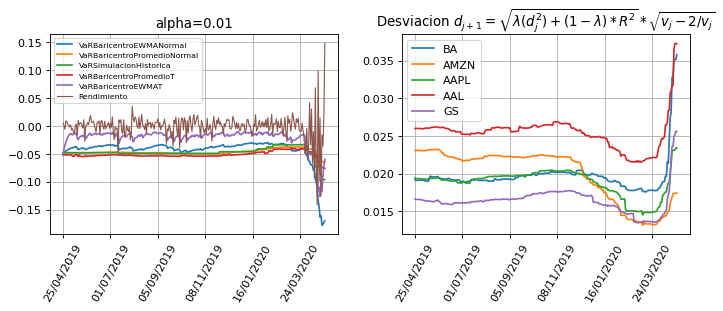

In [8]:
Metodos = [M.VaRBaricentroEWMANormal,
           M.VaRBaricentroPromedioNormal,
           M.VaRSimulacionHistorica,
           M.VaRBaricentroPromedioT,
           M.VaRBaricentroEWMAT]
m = ["VaRBaricentroEWMANormal", "VaRBaricentroPromedioNormal",
     "VaRSimulacionHistorica", "VaRBaricentroPromedioT", "VaRBaricentroEWMAT"]

title=["Desviacion movil",
       u"Desviación: $d_{j+1}=\sqrt{\lambda(d_{j}^{2})+(1-\lambda)*R^2}$",
       u"Desviacion $\sqrt{(v-2/v)}*desvest_{movil}$",
       u"Desviacion $d_{j+1}=\sqrt{\lambda(d_{j}^{2})+(1-\lambda)*R^2}*\sqrt{v_j-2/v_j}$"]
for mm,i in enumerate(alphas):
    fig = plt.figure(figsize=(8,2.5), dpi=80)
    ax1 = fig.add_axes([0,0,0.45,1])
    ax2 = fig.add_axes([0.55,0,0.45,1])
    for k,j in enumerate(Metodos):
        ax1.plot(j()["alpha="+str(i)], label=m[k])
        ax1.set_title("alpha="+str(i))
        if k<5:
            ax2.plot(M.get_desvest(M.stocks[k]), label=M.stocks[k])
    ax1.set_xticklabels(M.fechas[::len(M.fechas)//6],rotation=60)
    ax2.set_xticklabels(M.fechas[::len(M.fechas)//6],rotation=60)
    ax1.plot(M.rend["Rent"].values[-M.periodos:], lw=1, label="Rendimiento")
    ax1.legend( fontsize=7),ax1.grid()
    ax2.set_title(title[mm])
    ax2.legend(),ax2.grid()
    plt.show()

In [9]:
u = M.VaRSimulacionHistorica()
M.excepciones(u).head()#[M.excepciones(u)["alpha=0.1"]==True]

,Fechas,alpha=0.1,alpha=0.05,alpha=0.025,alpha=0.01
0,19/02/2019,False,False,False,False
1,20/02/2019,False,False,False,False
2,21/02/2019,False,False,False,False
3,22/02/2019,False,False,False,False
4,25/02/2019,False,False,False,False


In [10]:
M.BackTesting(u)

,0,1,2,3
p,0.1,0.05,0.025,0.01
x,29,19,13,9
m,277,277,277,277
BackTesting,27.7,13.85,6.925,2.77
p estimado,0.104693,0.0685921,0.0469314,0.032491
nivel de significancia,0.05,0.05,0.05,0.05
test de kupiec,0.066869,1.81529,4.36278,8.89341
Valor P,1.49203,0.119468,0.0215607,0.00156746
Zona de rechazo,No Rechazo H0,No Rechazo H0,Rechazo H0,Rechazo H0
Valor de eficiencia,0.895307,0.931408,0.953069,0.967509
